Reference Source: https://analyticsindiamag.com/quick-way-to-find-p-d-and-q-values-for-arima/

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

import pyodbc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None) # to view all the column details without truncation

In [3]:
# SWM Project connection string for SQL Server
connection_string = 'DRIVER={SQL Server};SERVER=192.168.0.100;DATABASE=MFB_LIVE;UID=sa;PWD=scs@123'
connection = pyodbc.connect(connection_string)

# SWM SQL query to select all records from the required table
query = "SELECT * FROM DP_MFB_BASE WHERE R_NO = 1"

# Execute the query and store the result in a DataFrame
df = pd.read_sql(query, connection)
df # Top 5 and bottom 5 rows and columns details

,NUM_1,UNID,UNIT_STATUS,ACTION_CODE,LATITUDE,LONGITUDE,STATION,TYCOD,SUB_TYCOD,PRIM_UNIT,ALARM_LEV,CD_TS_CLEAN_DISP,CD_TS_CLEAN,DS_TS_CLEAN,EN_TS_CLEAN,AR_TS_CLEAN,RANGE,R_NO,VEHICLE_TYPE,RESP_TIME_IN_MINS,ACKNOWLEDGE_TIME_IN_MINS,LEAVE_TIME_IN_MINS,TRAVEL_TIME_IN_MINS,INCI_COMBINED,HOUR_INCI_BIN,MNTH,YR,MNTH_NAME,MNTH_YR,DAY_OF_WEEK,CLEAN_DATE
0,F202301231,MP61,Dispatch,29,19.247632,72.862479,DAHISAR,RESCUE_SERVICE,BIRD_RESCUE,MP61,1,2023-01-20 13:55:53,2023-01-20 13:56:05,2023-01-20 13:56:05,2023-01-20 13:58:02,2023-01-20 14:03:59,REGION-4,1,MP,8.10,0.20,1.95,5.95,F202301231MP61,AFTERNOON,1,2023,January,Jan_2023,Friday,2023-01-20
1,F202301242,BK23,Dispatch,29,18.934805,72.834626,FORT,RESCUE_SERVICE,BIRD_RESCUE,BK23,1,2023-01-20 16:42:34,2023-01-20 16:42:49,2023-01-20 16:42:49,2023-01-20 16:50:01,2023-01-20 17:02:17,REGION-1,1,BK,19.72,0.25,7.20,12.27,F202301242BK23,AFTERNOON,1,2023,January,Jan_2023,Friday,2023-01-20
2,F202301364,MP39,Dispatch,29,19.230020,72.840612,BORIVALI,RESCUE_SERVICE,BIRD_RESCUE,MP39,1,2023-01-22 07:58:19,2023-01-22 08:05:11,2023-01-22 08:05:11,2023-01-22 08:05:46,2023-01-22 08:16:01,REGION-4,1,MP,17.70,6.87,0.58,10.25,F202301364MP39,MORNING,1,2023,January,Jan_2023,Sunday,2023-01-22
3,F202300310,BK11,Dispatch,29,19.261711,72.851505,KANDARPADA,FIRE_CALL,FIRE_CALL,BK11,1,2023-01-08 13:45:10,2023-01-08 13:45:26,NaT,NaT,NaT,REGION-4,1,BK,0.00,0.00,0.00,0.00,F202300310BK11,AFTERNOON,1,2023,January,Jan_2023,Sunday,2023-01-08
4,F202300321,MP36,Dispatch,29,19.197250,72.871520,DINDOSHI,RESCUE_SERVICE,BIRD_RESCUE,MP36,1,2023-01-08 16:40:36,2023-01-08 16:40:48,NaT,NaT,NaT,REGION-4,1,MP,0.00,0.00,0.00,0.00,F202300321MP36,AFTERNOON,1,2023,January,Jan_2023,Sunday,2023-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15983,F202312679,MP43,Dispatch,29,19.070771,72.868015,BKC,FIRE_CALL,FIRE_CALL,MP43,1,2023-09-08 16:56:47,2023-09-08 16:57:44,2023-09-08 16:57:44,2023-09-08 17:00:23,2023-09-08 17:36:08,REGION-3,1,MP,39.35,0.95,2.65,35.75,F202312679MP43,AFTERNOON,9,2023,September,Sep_2023,Friday,2023-09-08
15984,F202312726,MP34,Dispatch,29,18.961477,72.812637,GAWALATANK,RESCUE_SERVICE,ANIMAL_RESCUE,MP34,1,2023-09-10 09:42:16,2023-09-10 09:43:39,2023-09-10 09:43:39,2023-09-10 10:20:56,2023-09-10 10:21:02,REGION-1,1,MP,38.77,1.38,37.28,0.10,F202312726MP34,MORNING,9,2023,September,Sep_2023,Sunday,2023-09-10
15985,F202312887,MP38,Dispatch,29,19.201187,72.858109,KANDIVALI,RESCUE_SERVICE,BIRD_RESCUE,MP38,1,2023-09-16 17:45:32,2023-09-16 18:35:48,2023-09-16 18:35:48,2023-09-16 18:36:28,2023-09-16 19:43:49,REGION-4,1,MP,118.28,50.27,0.67,67.35,F202312887MP38,EVENING,9,2023,September,Sep_2023,Saturday,2023-09-16
15986,F202312981,MP59,Dispatch,29,18.957974,72.832664,MEMONWADA,HOUSE_COLLAPSE,HOUSE_COLLAPSE,MP59,1,2023-09-19 12:44:34,2023-09-19 12:45:08,2023-09-19 12:45:08,2023-09-19 12:48:52,2023-09-19 13:01:37,REGION-1,1,MP,17.05,0.57,3.73,12.75,F202312981MP59,AFTERNOON,9,2023,September,Sep_2023,Tuesday,2023-09-19


In [4]:
df.NUM_1.unique()

array(['F202301231', 'F202301242', 'F202301364', ..., 'F202312887',
       'F202312981', 'F202312995'], dtype=object)

In [5]:
df1 = df[['NUM_1', 'CLEAN_DATE']].copy()
df1

,NUM_1,CLEAN_DATE
0,F202301231,2023-01-20
1,F202301242,2023-01-20
2,F202301364,2023-01-22
3,F202300310,2023-01-08
4,F202300321,2023-01-08
...,...,...
15983,F202312679,2023-09-08
15984,F202312726,2023-09-10
15985,F202312887,2023-09-16
15986,F202312981,2023-09-19


In [6]:
# Group by 'CLEAN_DATE' and count occurrences of 'NUM_1'
df_grouped = df1.groupby('CLEAN_DATE', as_index=False)['NUM_1'].count()

# Rename the count column to 'NUM_1_Count'
df_grouped.rename(columns={'NUM_1': 'NUM_1_Count'}, inplace=True)

# Print or display the resulting DataFrame
df_grouped

,CLEAN_DATE,NUM_1_Count
0,2022-11-30,25
1,2022-12-01,29
2,2022-12-02,37
3,2022-12-03,42
4,2022-12-04,28
...,...,...
382,2023-12-17,27
383,2023-12-18,35
384,2023-12-19,30
385,2023-12-20,30


In [7]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [8]:
# Ensure 'CLEAN_DATE' is in datetime format and set it as the index
df_grouped['CLEAN_DATE'] = pd.to_datetime(df_grouped['CLEAN_DATE'])

In [9]:
# Check stationarity
def check_stationarity(data):
    result = adfuller(data) # applying the Augmented Dickey-Fuller test
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')
        
check_stationarity(df_grouped['NUM_1_Count']) # using the function for checking stationarity details

ADF Statistic: -2.3096479132137797
p-value: 0.1688752057570228
Critical Values:
1%: -3.447909006729481
5%: -2.8692783343881483
10%: -2.5708923751111112


Here we can see that the p-value is more than 0.05 the considered alpha value which this means our null hypothesis will be rejected and we will take this series as non-stationary.

In [10]:
df_grouped

,CLEAN_DATE,NUM_1_Count
0,2022-11-30,25
1,2022-12-01,29
2,2022-12-02,37
3,2022-12-03,42
4,2022-12-04,28
...,...,...
382,2023-12-17,27
383,2023-12-18,35
384,2023-12-19,30
385,2023-12-20,30


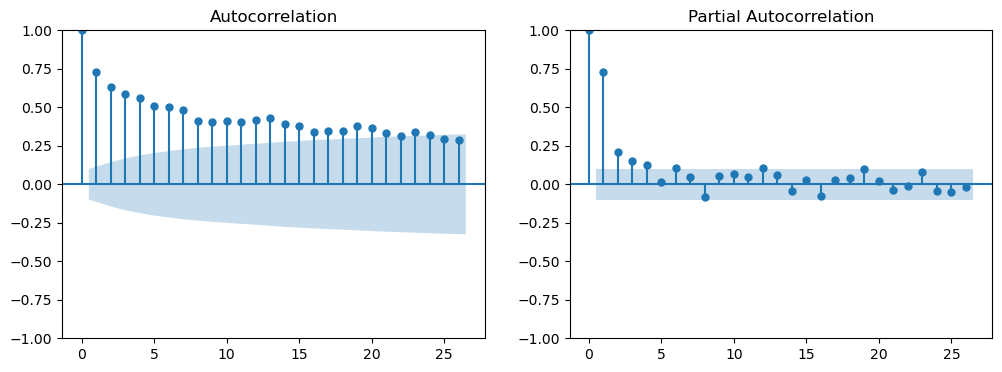

In [11]:
# Plot ACF (Auto Correlation function) and PACF (Partial Auto Correlation function)
def plot_acf_pacf(data):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(data, ax=axes[0])
    plot_pacf(data, ax=axes[1])
    plt.show()
    
plot_acf_pacf(df_grouped['NUM_1_Count'])    

- p is the number of autoregressive terms,
- d is the number of nonseasonal differences,
- q is the number of lagged forecast errors in the prediction equation.

**Finding the value of the d parameter:**

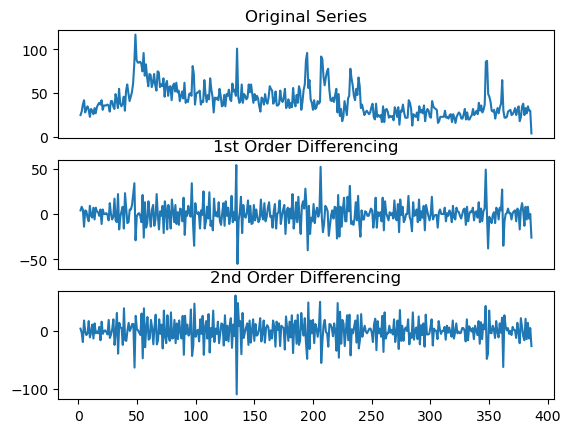

In [12]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df_grouped.NUM_1_Count); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df_grouped.NUM_1_Count.diff()); ax2.set_title('\n1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(df_grouped.NUM_1_Count.diff().diff()); ax3.set_title('\n2nd Order Differencing')
plt.show()

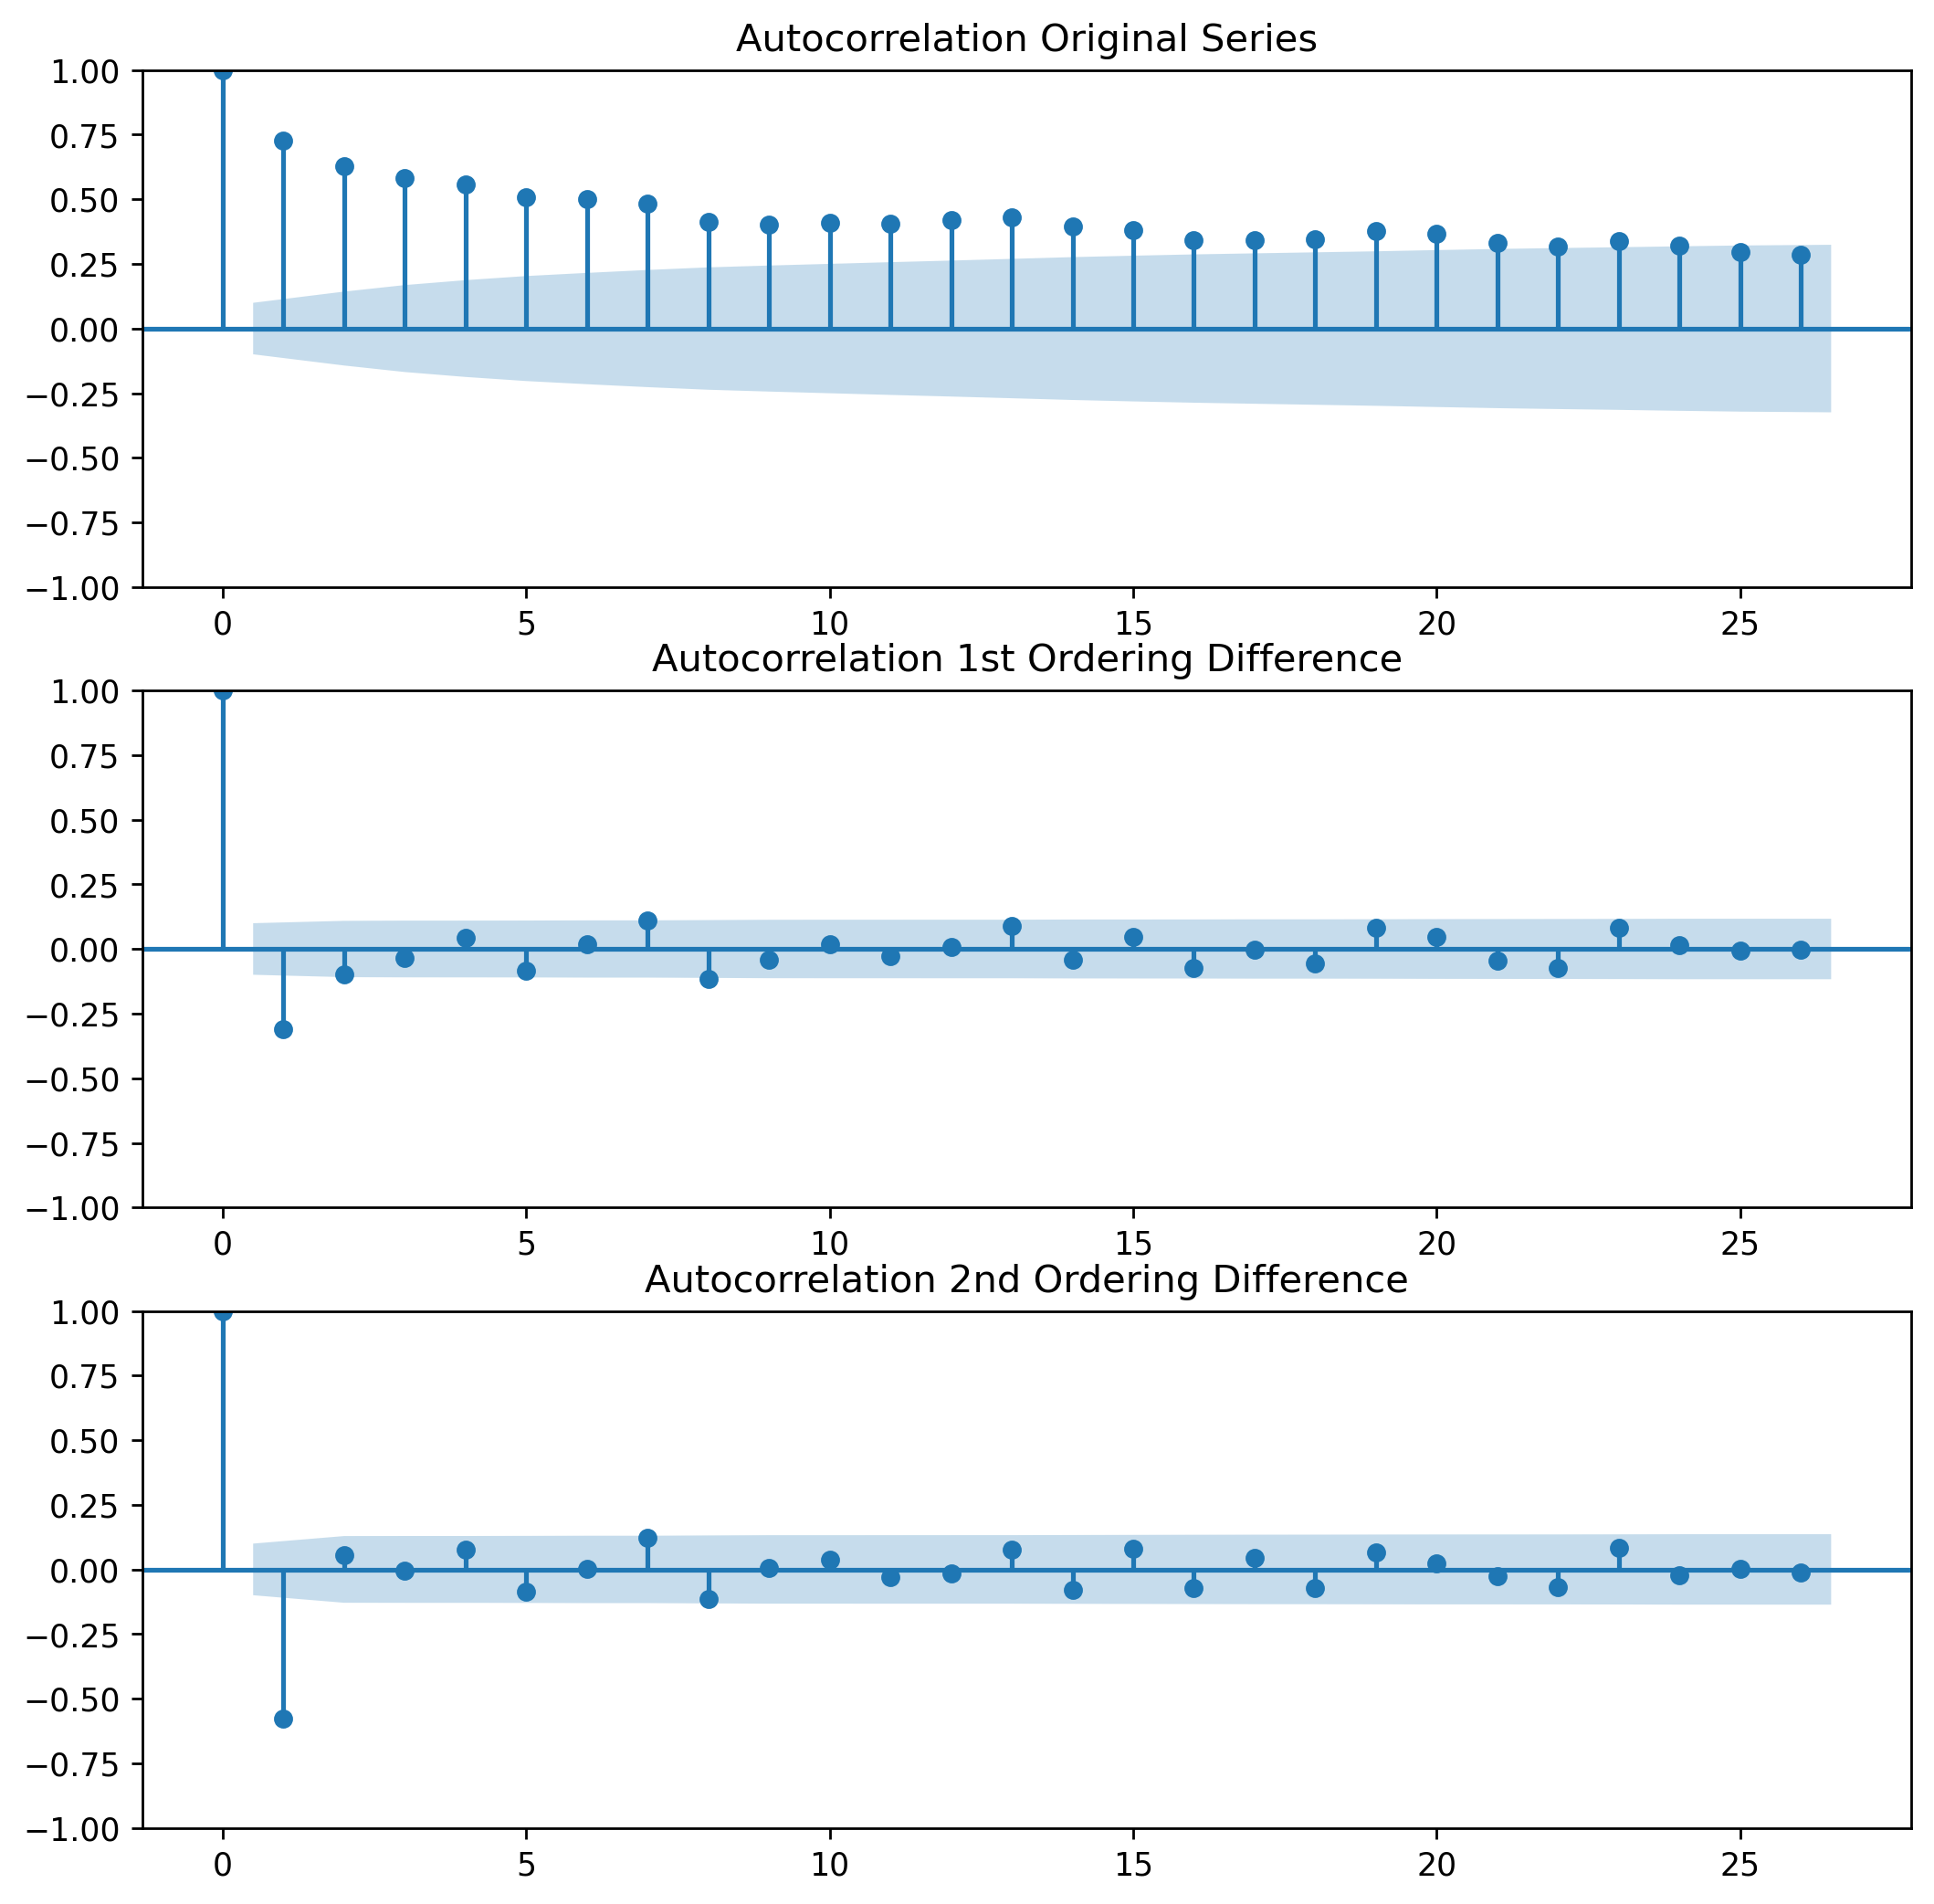

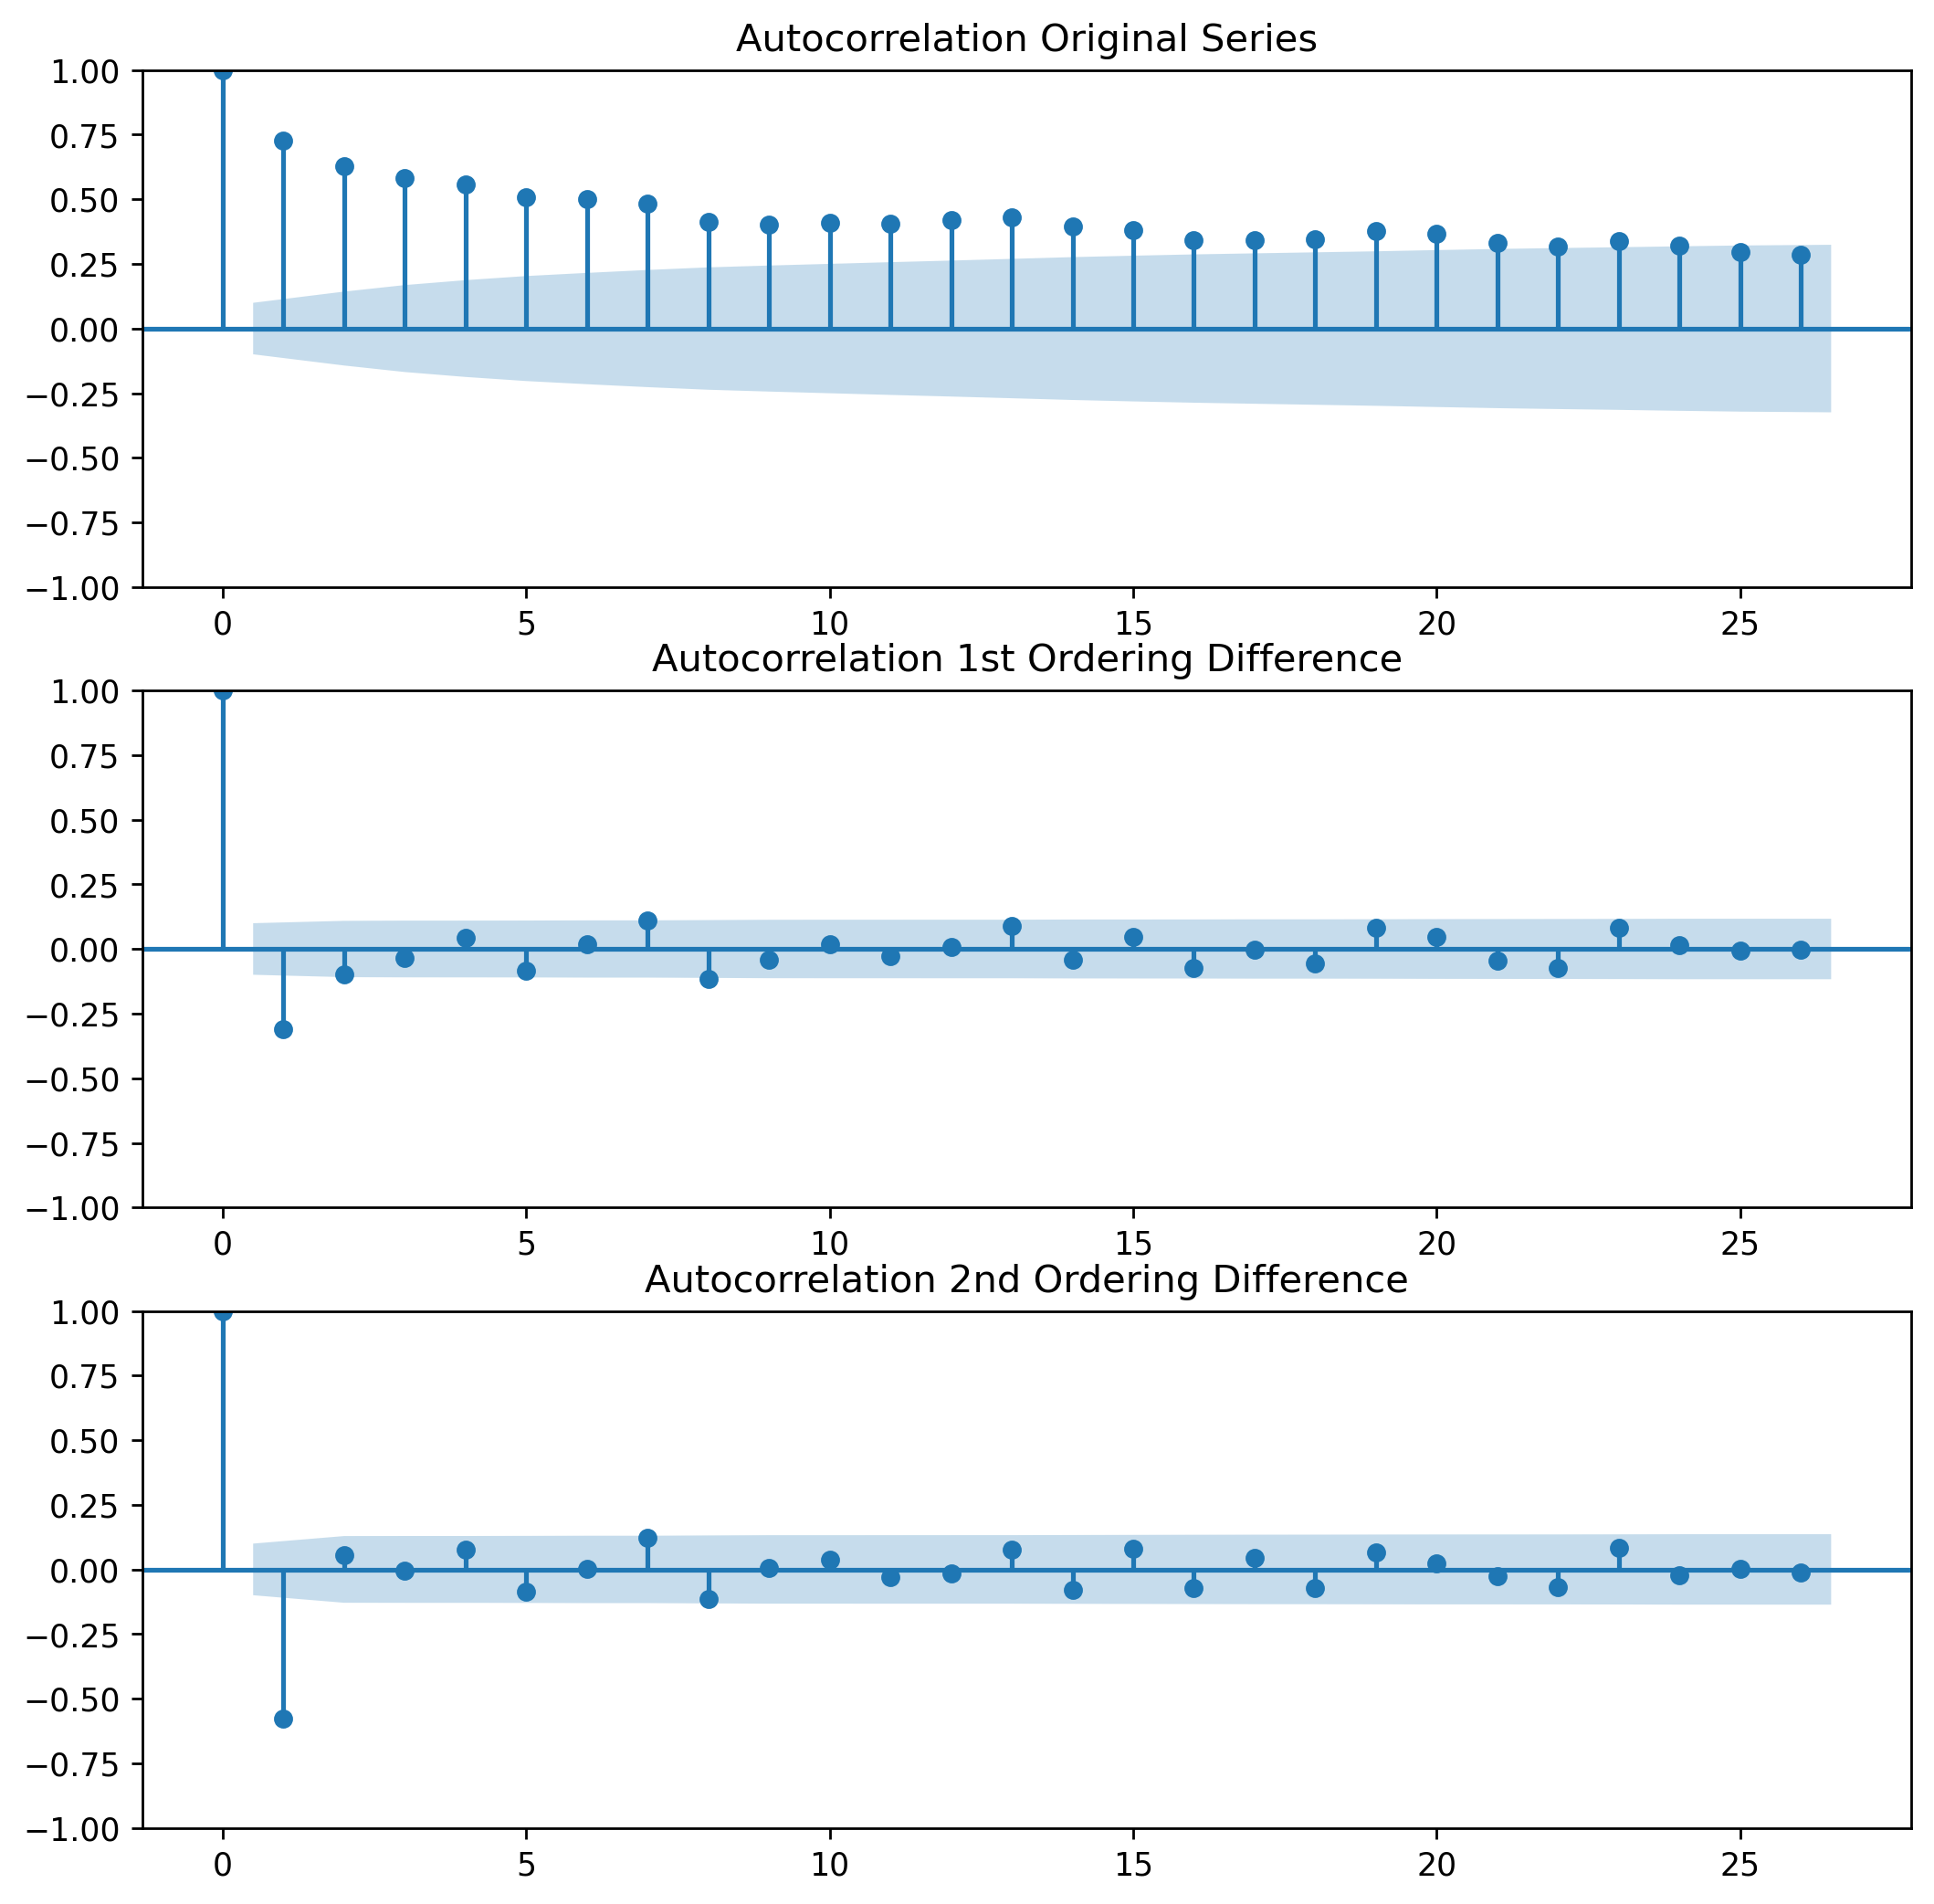

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

plt.rcParams.update({'figure.figsize':(10,10), 'figure.dpi':250})
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df_grouped.NUM_1_Count, ax=ax1, title='Autocorrelation Original Series')
plot_acf(df_grouped.NUM_1_Count.diff().dropna(), ax=ax2, title='Autocorrelation 1st Ordering Difference')
plot_acf(df_grouped.NUM_1_Count.diff().diff().dropna(), ax=ax3, title='Autocorrelation 2nd Ordering Difference')

**Finding the value of the p parameter**

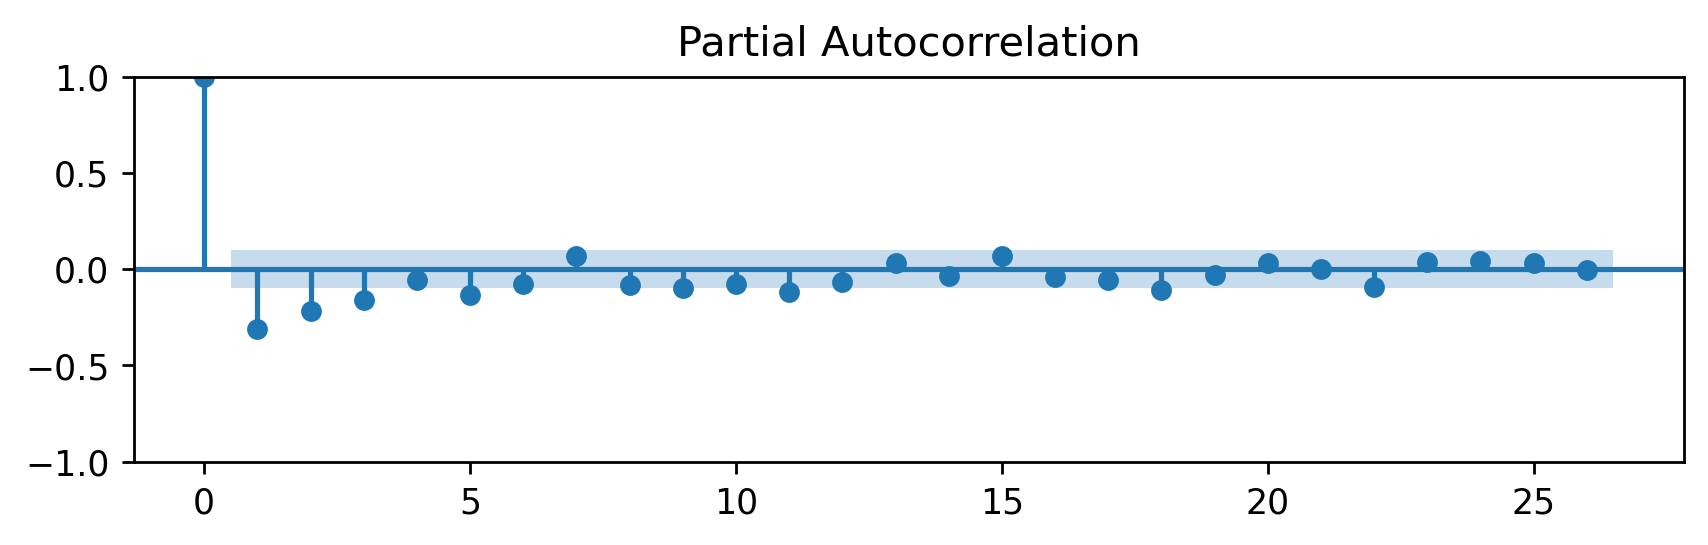

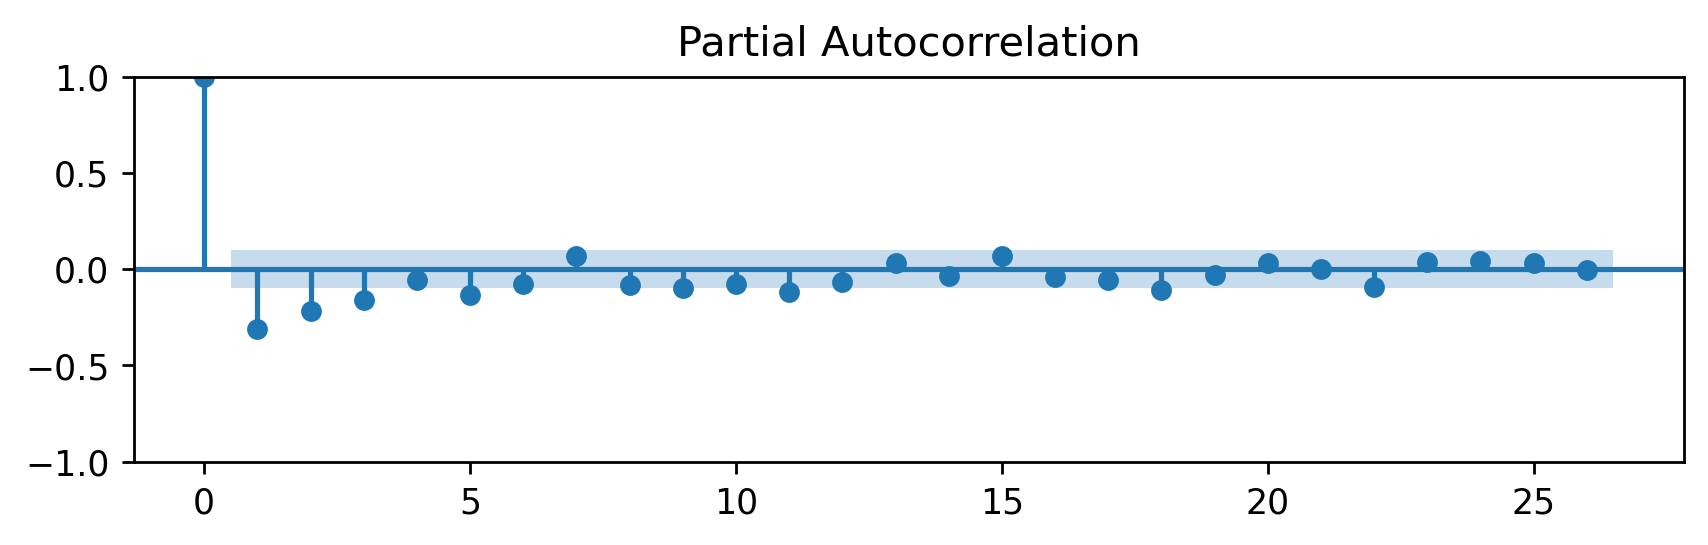

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams.update({'figure.figsize':(8,2), 'figure.dpi':250})
plot_pacf(df_grouped.NUM_1_Count.diff().dropna())

**Finding the value of the q parameter**

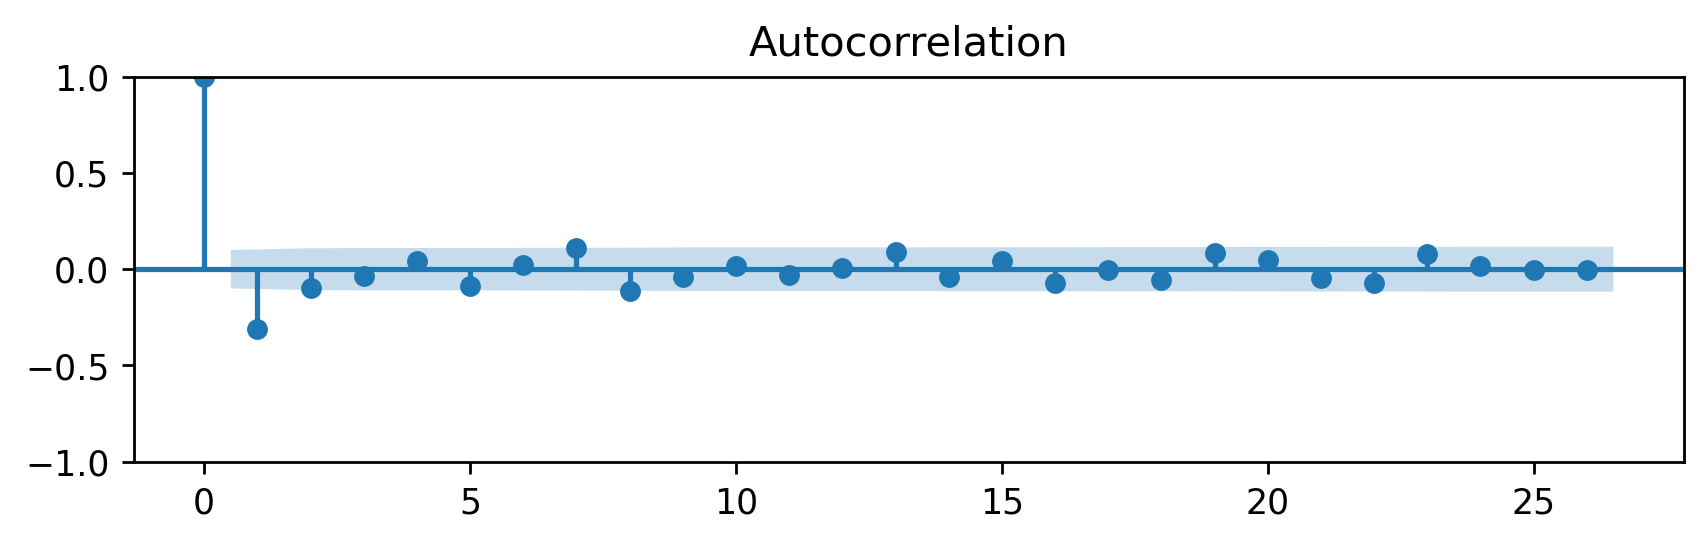

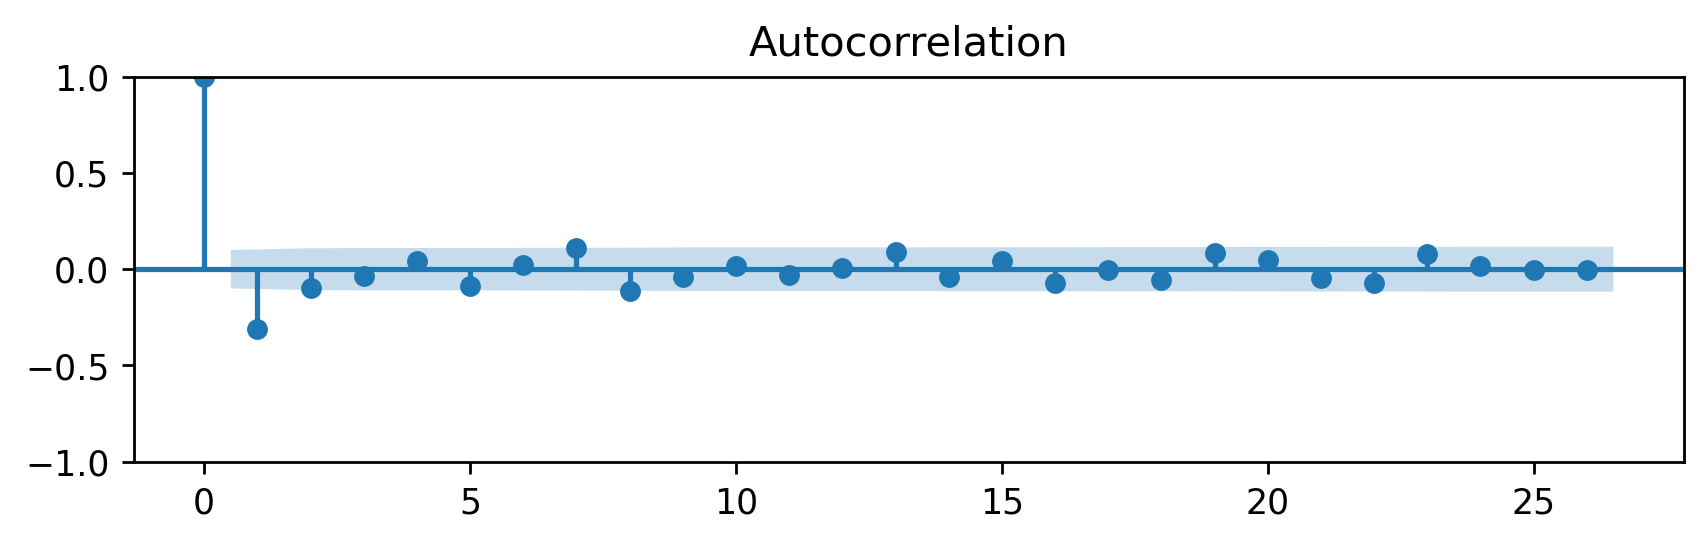

In [15]:
plt.rcParams.update({'figure.figsize':(8,2), 'figure.dpi':250})
plot_acf(df_grouped.NUM_1_Count.diff().dropna())

In [16]:
from sklearn.model_selection import train_test_split
# Sorting the DataFrame by CLEAN_DATE column
df_grouped.sort_values(by='CLEAN_DATE', inplace=True)
df_grouped

,CLEAN_DATE,NUM_1_Count
0,2022-11-30,25
1,2022-12-01,29
2,2022-12-02,37
3,2022-12-03,42
4,2022-12-04,28
...,...,...
382,2023-12-17,27
383,2023-12-18,35
384,2023-12-19,30
385,2023-12-20,30


Outliers:
    CLEAN_DATE  NUM_1_Count
46  2023-01-15           83
47  2023-01-16          117
48  2023-01-17           88
49  2023-01-18           85
50  2023-01-19           85
51  2023-01-20           86
52  2023-01-21           84
54  2023-01-23           96
56  2023-01-25           83
96  2023-03-06           81
134 2023-04-13          101
193 2023-06-11           88
194 2023-06-12           96
206 2023-06-24           92
207 2023-06-25           89
347 2023-11-12           86
348 2023-11-13           87


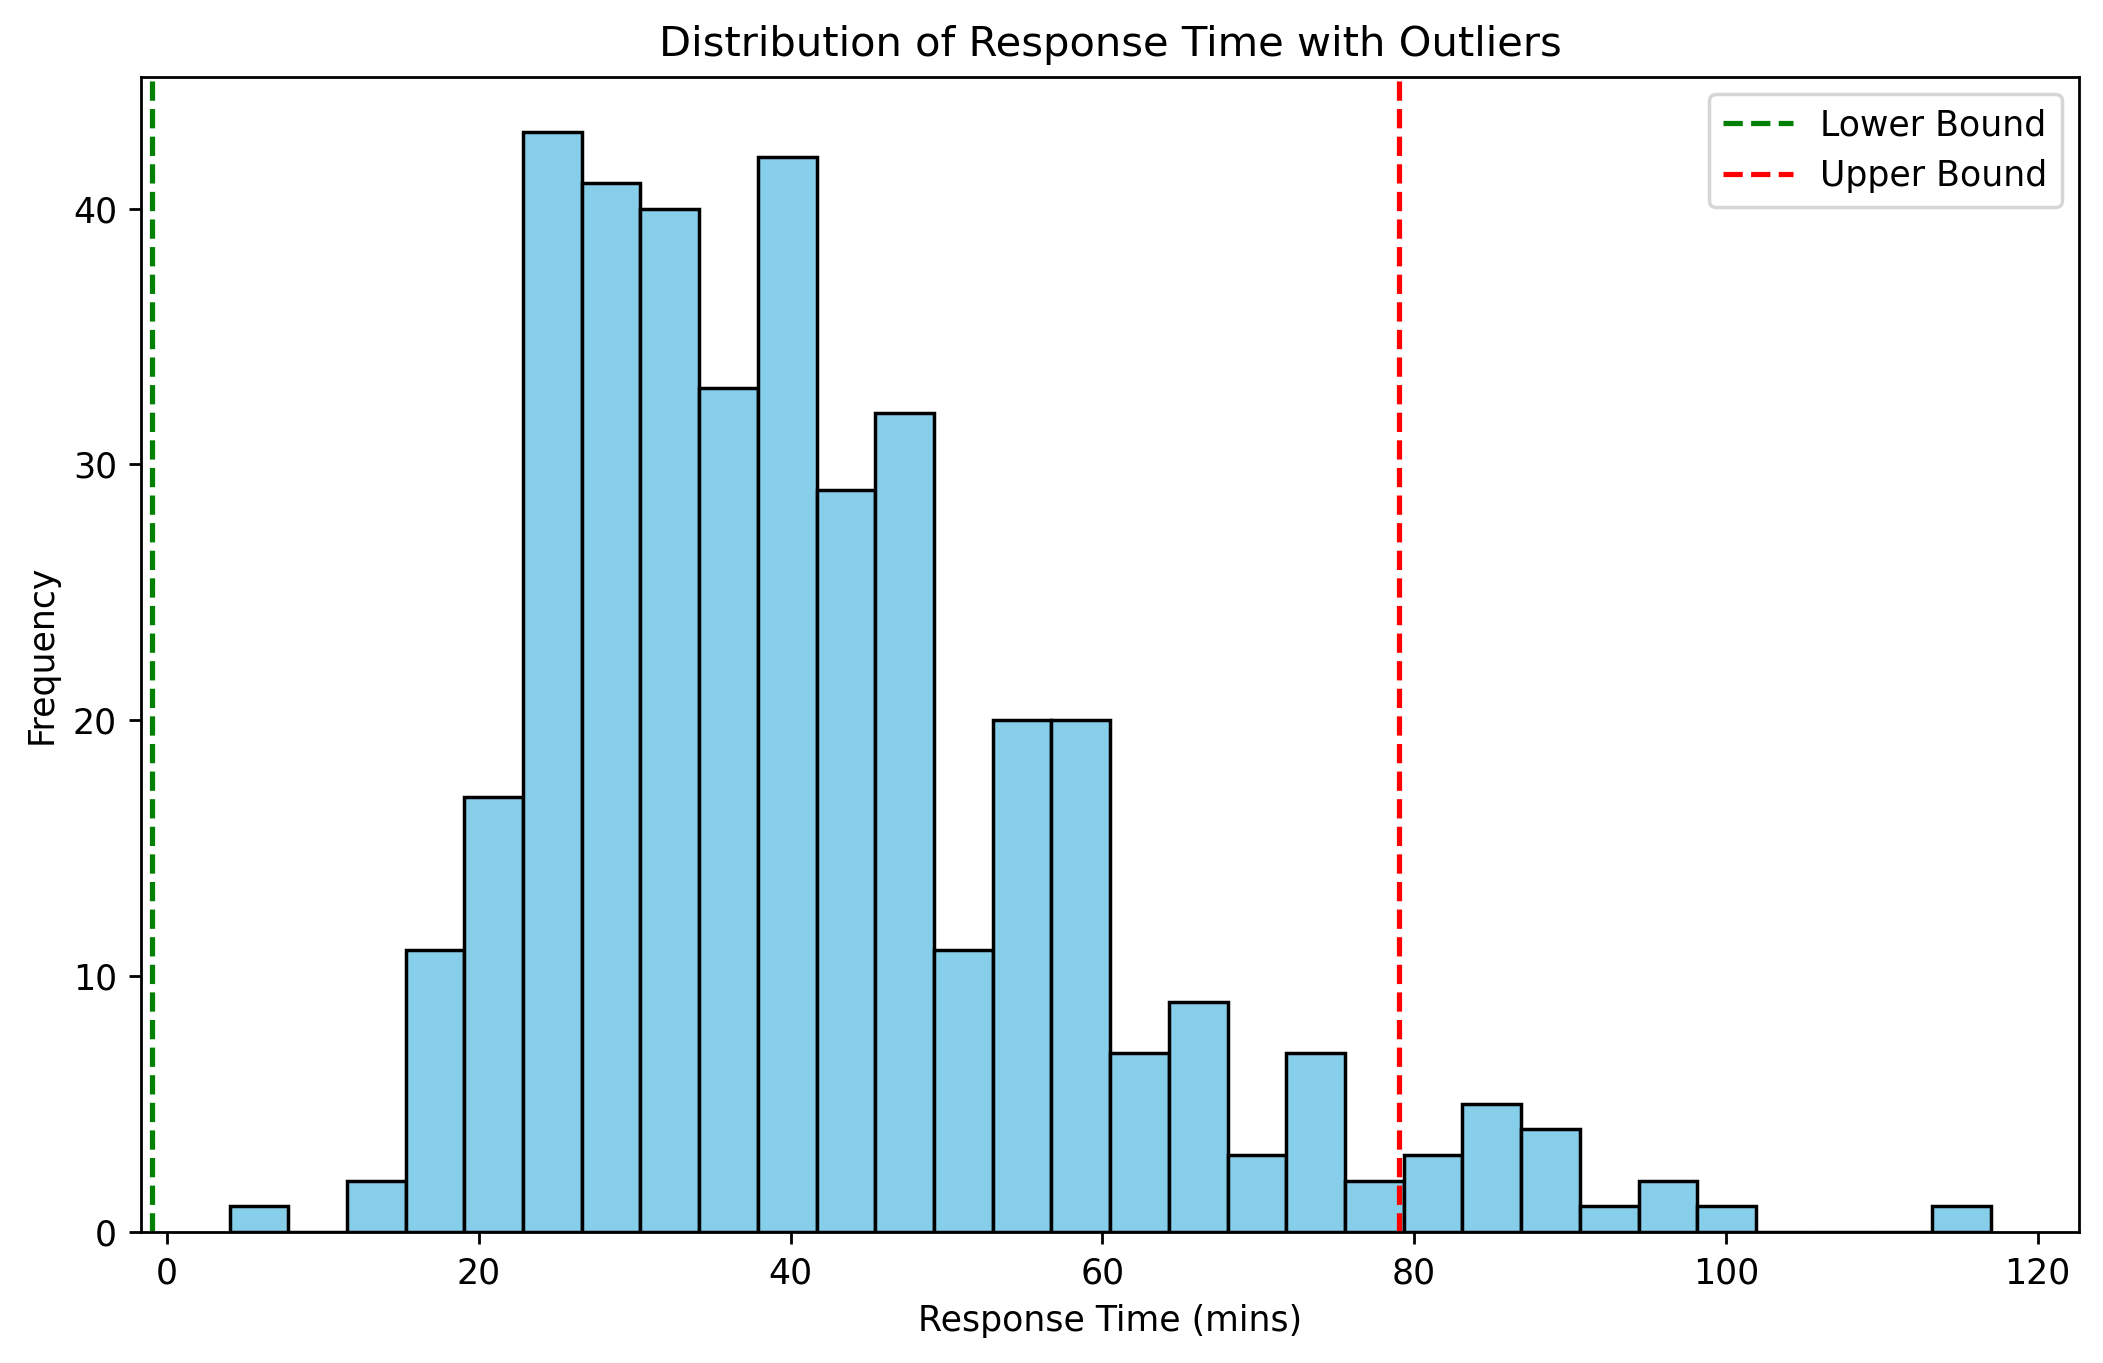

In [17]:
# Calculating the first quartile (Q1) and third quartile (Q3)
Q1 = df_grouped['NUM_1_Count'].quantile(0.25)
Q3 = df_grouped['NUM_1_Count'].quantile(0.75)

# Calculating the interquartile range (IQR)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df_grouped[(df_grouped['NUM_1_Count'] < lower_bound) | (df_grouped['NUM_1_Count'] > upper_bound)]

# Printing the the outliers
print("Outliers:")
print(outliers)

# Visualizing the distribution of 'RESP_TIME_IN_MINS' with outliers
plt.figure(figsize=(10, 6))
plt.hist(df_grouped['NUM_1_Count'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Response Time (mins)')
plt.ylabel('Frequency')
plt.title('Distribution of Response Time with Outliers')
plt.axvline(x=lower_bound, color='green', linestyle='--', label='Lower Bound')
plt.axvline(x=upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.legend()
plt.show()

In [18]:
# Split the data into training and testing sets
train_size = int(len(df_grouped) * 0.7)
train_data, test_data = df_grouped.iloc[:train_size], df_grouped.iloc[train_size:]

In [19]:
train_data

,CLEAN_DATE,NUM_1_Count
0,2022-11-30,25
1,2022-12-01,29
2,2022-12-02,37
3,2022-12-03,42
4,2022-12-04,28
...,...,...
265,2023-08-22,24
266,2023-08-23,23
267,2023-08-24,24
268,2023-08-25,19


In [20]:
test_data

,CLEAN_DATE,NUM_1_Count
270,2023-08-27,30
271,2023-08-28,23
272,2023-08-29,34
273,2023-08-30,14
274,2023-08-31,30
...,...,...
382,2023-12-17,27
383,2023-12-18,35
384,2023-12-19,30
385,2023-12-20,30


# ARIMA (Auto Regressive Integrated Moving Average)

In [21]:
p=1
d=2
q=1

# Fit ARIMA model
model = ARIMA(train_data['NUM_1_Count'], order=(p, d, q))
result = model.fit()

# Print summary of the model
print(result.summary())

# Forecast future values (next 50 time points)
forecast = result.forecast(steps=100)

# Print or display the forecasted values
print("Forecasted values:")
forecast

                               SARIMAX Results                                
Dep. Variable:            NUM_1_Count   No. Observations:                  270
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -1060.712
Date:                Fri, 15 Mar 2024   AIC                           2127.423
Time:                        10:03:20   BIC                           2138.196
Sample:                             0   HQIC                          2131.750
                                - 270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3310      0.048     -6.943      0.000      -0.424      -0.238
ma.L1         -0.9998      1.822     -0.549      0.583      -4.572       2.572
sigma2       156.7358    285.862      0.548      0.5

270    29.055438
271    30.713436
272    30.185686
273    30.381518
274    30.337811
         ...    
365    31.796728
366    31.812598
367    31.828467
368    31.844336
369    31.860205
Name: predicted_mean, Length: 100, dtype: float64

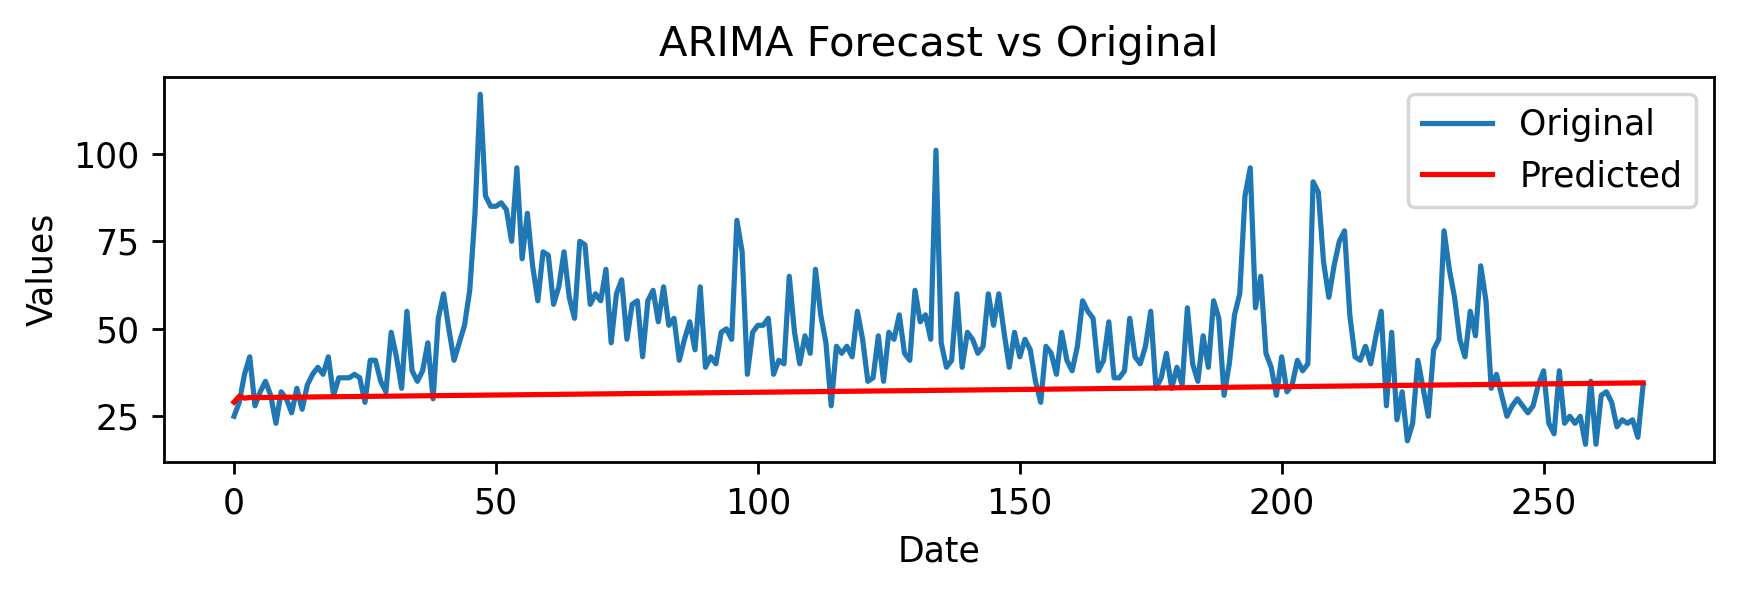

In [22]:
# Fit ARIMA model
model = ARIMA(train_data['NUM_1_Count'], order=(p, d, q))
result = model.fit()

# Generate predictions
forecast = result.forecast(len(train_data))

# Plotting the original series and predicted values
plt.plot(train_data['NUM_1_Count'], label='Original')
plt.plot(train_data.index, forecast, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('ARIMA Forecast vs Original')
plt.legend()
plt.show()

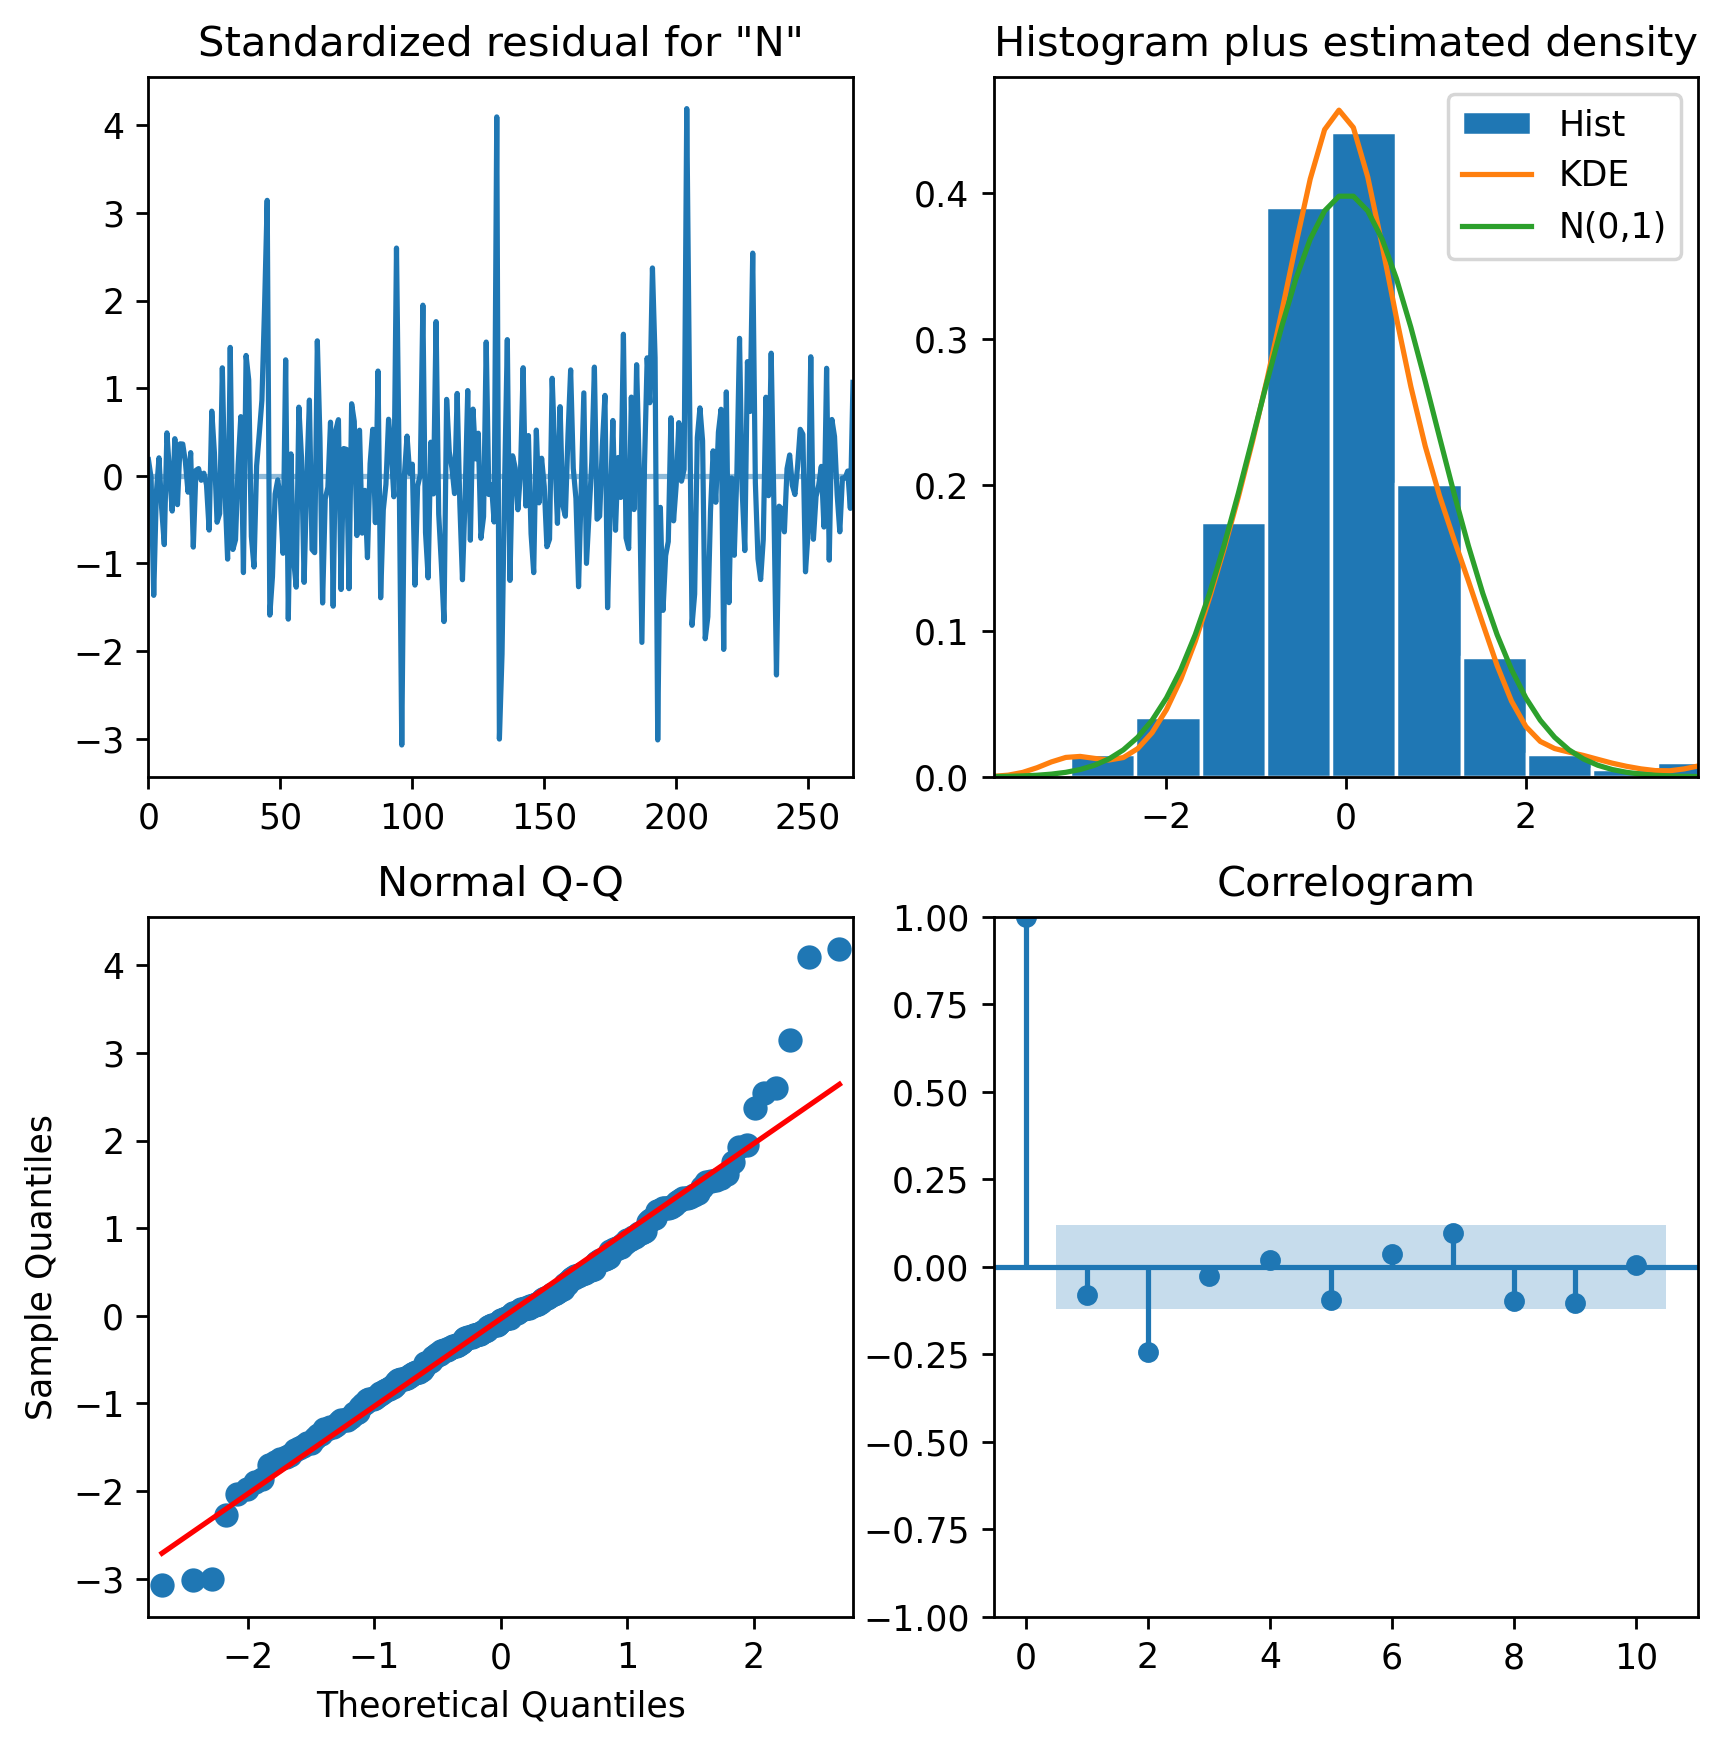

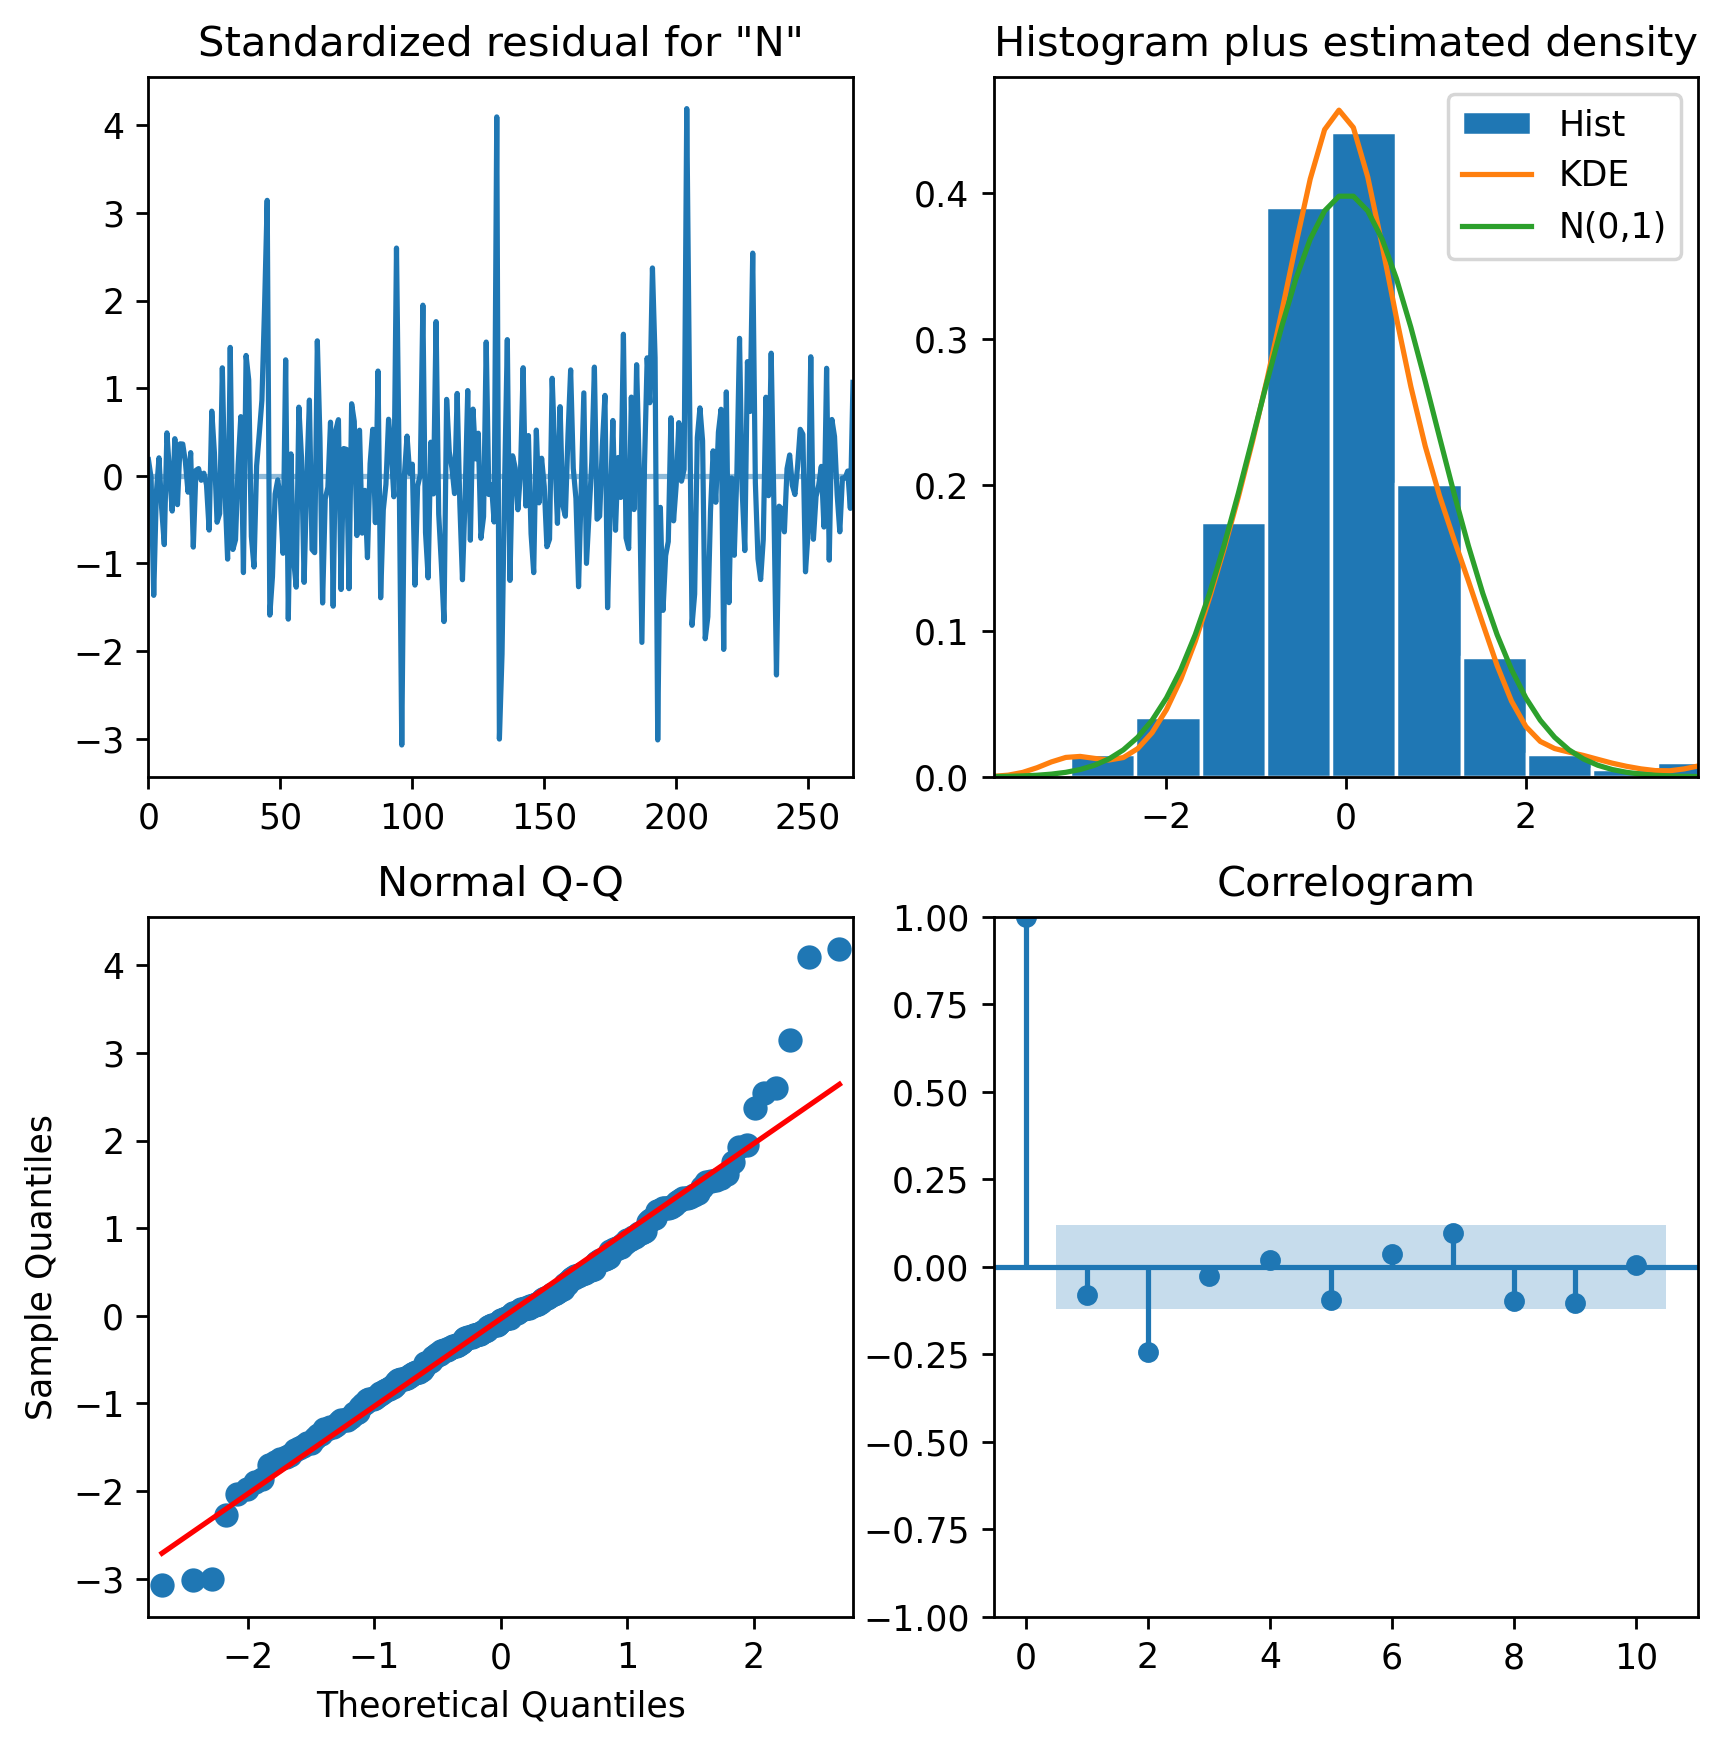

In [23]:
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':250})
result.plot_diagnostics()

In [24]:
# Making predictions using ARIMA model
start_index = len(df_grouped)
end_index = start_index + len(df_grouped) - 1
y_pred = result.predict(start=start_index, end=end_index, typ='levels')

In [25]:
from sklearn.metrics import mean_squared_error
# Evaluate the model with MSE
mse = mean_squared_error(df_grouped['NUM_1_Count'], y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 363.19534189462223


In [26]:
# RMSE
np.sqrt(mse)

19.05768458902136

In [27]:
from sklearn.metrics import mean_absolute_percentage_error
# MAPE
mean_absolute_percentage_error(df_grouped['NUM_1_Count'], y_pred)

0.3609914627344233

In [28]:
y_pred

387    32.145851
388    32.161721
389    32.177590
390    32.193459
391    32.209328
         ...    
769    38.207896
770    38.223765
771    38.239634
772    38.255504
773    38.271373
Name: predicted_mean, Length: 387, dtype: float64

In [29]:
len(df_grouped)

387

In [30]:
len(train_data)

270

In [31]:
len(test_data)

117

In [32]:
result.forecast(len(train_data))

270    29.055438
271    30.713436
272    30.185686
273    30.381518
274    30.337811
         ...    
535    34.494497
536    34.510366
537    34.526235
538    34.542105
539    34.557974
Name: predicted_mean, Length: 270, dtype: float64

In [33]:
result.predict(len(train_data))

270    29.055438
dtype: float64